Required/Useful libraries

In [1]:
import pandas as pd
import numpy as np
import chart_studio.plotly as py
import cufflinks as cf
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
%matplotlib inline

# Make Plotly work in your Jupyter Notebook
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
# Use Plotly locally
cf.go_offline()

#### At a glance

In [3]:
# create a DF from a numpy array
arr = np.random.randn(20, 4)
df_glance = pd.DataFrame(arr, columns=["A", "B", "C", "D"])
df_glance.head()

,A,B,C,D
0,0.329959,-1.269203,1.914981,-0.657112
1,1.336762,-0.080400,-0.194311,2.256078
2,-0.386282,1.072867,0.617792,1.227365
3,-0.382807,-1.353720,0.791796,-2.232348
4,0.045330,0.329196,2.489005,1.002472


<AxesSubplot:>

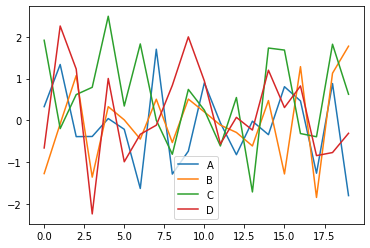

In [4]:
df_glance.plot()

In [5]:
df_glance.iplot()

Much nicer, right?

### **Line Plots**

In [18]:
template_style = "plotly_dark"

- Example 1 [Single Plot]

In [34]:
df_gap = px.data.gapminder().query("country == 'Argentina'")
df_gap

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
48,Argentina,Americas,1952,62.485,17876956,5911.315053,ARG,32
49,Argentina,Americas,1957,64.399,19610538,6856.856212,ARG,32
50,Argentina,Americas,1962,65.142,21283783,7133.166023,ARG,32
51,Argentina,Americas,1967,65.634,22934225,8052.953021,ARG,32
52,Argentina,Americas,1972,67.065,24779799,9443.038526,ARG,32
53,Argentina,Americas,1977,68.481,26983828,10079.026740,ARG,32
54,Argentina,Americas,1982,69.942,29341374,8997.897412,ARG,32
55,Argentina,Americas,1987,70.774,31620918,9139.671389,ARG,32
56,Argentina,Americas,1992,71.868,33958947,9308.418710,ARG,32
57,Argentina,Americas,1997,73.275,36203463,10967.281950,ARG,32


In [35]:
df_gap.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12 entries, 48 to 59
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    12 non-null     object 
 1   continent  12 non-null     object 
 2   year       12 non-null     int64  
 3   lifeExp    12 non-null     float64
 4   pop        12 non-null     int64  
 5   gdpPercap  12 non-null     float64
 6   iso_alpha  12 non-null     object 
 7   iso_num    12 non-null     int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 864.0+ bytes


In [36]:
px.line(df_gap,
        x="year",
        y="lifeExp",
        title="<b>Life Expectancy in Argentina (1952-2007)</b>",
        template=template_style)

- Example 2 [Multiple Plots]

In [37]:
df_stocks = px.data.stocks()
df_stocks

,date,GOOG,AAPL,AMZN,FB,NFLX,MSFT
0,2018-01-01,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,2018-01-08,1.018172,1.011943,1.061881,0.959968,1.053526,1.015988
2,2018-01-15,1.032008,1.019771,1.053240,0.970243,1.049860,1.020524
3,2018-01-22,1.066783,0.980057,1.140676,1.016858,1.307681,1.066561
4,2018-01-29,1.008773,0.917143,1.163374,1.018357,1.273537,1.040708
...,...,...,...,...,...,...,...
100,2019-12-02,1.216280,1.546914,1.425061,1.075997,1.463641,1.720717
101,2019-12-09,1.222821,1.572286,1.432660,1.038855,1.421496,1.752239
102,2019-12-16,1.224418,1.596800,1.453455,1.104094,1.604362,1.784896
103,2019-12-23,1.226504,1.656000,1.521226,1.113728,1.567170,1.802472


In [74]:
px.line(df_stocks,
        x="date",
        y=["AAPL", "MSFT", "GOOG"],
        labels={"date": "<b>Date</b>",
                "value": "<b>Value (USD)</b>"},
        title="<b>Apple vs Microsoft vs Google Stock Price (2018-2019)</b>")

**Styling**

In [53]:
# create a figure
fig1 = go.Figure()
# add Apple plot
fig1.add_trace(go.Scatter(x=df_stocks["date"],
                          y=df_stocks["AAPL"],
                          mode="lines",
                          name="Apple"))
# add Microsoft plot
fig1.add_trace(go.Scatter(x=df_stocks["date"],
                          y=df_stocks["MSFT"],
                          mode="lines+markers",
                          name="Microsoft"))
# add Google plot
fig1.add_trace(go.Scatter(x=df_stocks["date"],
                          y=df_stocks["GOOG"],
                          mode="lines",
                          name="Google",
                          line=dict(color='green', width=2, dash='dashdot')))

**Further Styling the Figure**

In [57]:
fig1.update_layout(title="<b>Stock Price (Apple vs Microsoft vs Google) [2018-2019]</b>",
                   xaxis_title="<b>Date</b>",
                   yaxis_title="<b>Price (USD)</b>",
                   template=template_style)

NOTE: see the `plotly_tut` file for even further, crazy styling.

### **Bar Charts**

- Example 1

In [2]:
df_poll = px.data.election()
df_poll.head()

,district,Coderre,Bergeron,Joly,total,winner,result,district_id
0,101-Bois-de-Liesse,2481,1829,3024,7334,Joly,plurality,101
1,102-Cap-Saint-Jacques,2525,1163,2675,6363,Joly,plurality,102
2,11-Sault-au-Récollet,3348,2770,2532,8650,Coderre,plurality,11
3,111-Mile-End,1734,4782,2514,9030,Bergeron,majority,111
4,112-DeLorimier,1770,5933,3044,10747,Bergeron,majority,112


In [16]:
distr = df_poll["district"].apply(lambda x: x.split("-")[0]).values
distr.sort()

In [19]:
px.bar(df_poll,
       x=distr,
       y="total",
       color="winner",
       labels={"x": "<b>District</b>",
               "total": "<b>Total Voters</b>"},
       hover_name="district",
       title="<b>2013 Montreal Mayoral Election</b>",
       template=template_style)

TODO: sort district_id in descending order displaying all xticks

- Example 2

[Stacked Bar]

In [153]:
df_tips = px.data.tips()
df_tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [159]:
px.bar(df_tips,
       x="day",
       y="tip",
       color="sex",
       labels={"day": "<b>Day</b>",
               "tip": "<b>Tip Amount</b>"},
       title="<b>Total Tip Each Day based on Client Sex</b>",
       template="gridon")

[Group bar]

In [165]:
px.bar(df_tips,
       x="sex",
       y="total_bill",
       color="smoker",
       barmode="group")

**Styling**

In [166]:
df_poll.head()

,district,Coderre,Bergeron,Joly,total,winner,result,district_id
0,101-Bois-de-Liesse,2481,1829,3024,7334,Joly,plurality,101
1,102-Cap-Saint-Jacques,2525,1163,2675,6363,Joly,plurality,102
2,11-Sault-au-Récollet,3348,2770,2532,8650,Coderre,plurality,11
3,111-Mile-End,1734,4782,2514,9030,Bergeron,majority,111
4,112-DeLorimier,1770,5933,3044,10747,Bergeron,majority,112


In [187]:
# consider district wiht 9.000 or more voters
df_poll2 = df_poll.loc[df_poll["total"] >= 9000]

In [190]:
distr2 = df_poll2["district"].apply(lambda x: x.split("-")[0]).values

In [201]:
fig2 = px.bar(df_poll2,
       x=distr2,
       y="total",
       color="district",
       text="total",
       range_y=[0, 15000],
       labels={"x": "<b>District</b>",
               "total": "<b>Total Voters</b>"},
       hover_name="district",
       title="<b>2013 Montreal Mayoral Election [Voters >= 9.000]</b>",
       template="ggplot2")
fig2.update_traces(texttemplate="%{text:.3s}",
                   textposition="outside")
fig2.update_layout(uniformtext_minsize=8)
fig2

#### **Scatter Plot**

- Example 1